Decision Tree Classifier

Мета : написати свій простий, але доволі добрий і робочий код of a decision tree classifier class

В цьому дослідженні ми вирішили випробувати наш код на breast cancer dataset, який також є вбудованим у бібліотеку sklearn

In [28]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [29]:
cancer = load_breast_cancer()
dir(cancer)


In [ ]:
cancer.data.shape

In [ ]:
cancer.data[0:2]

To understand data a tad bit better

Text(0, 0.5, 'Second feature')

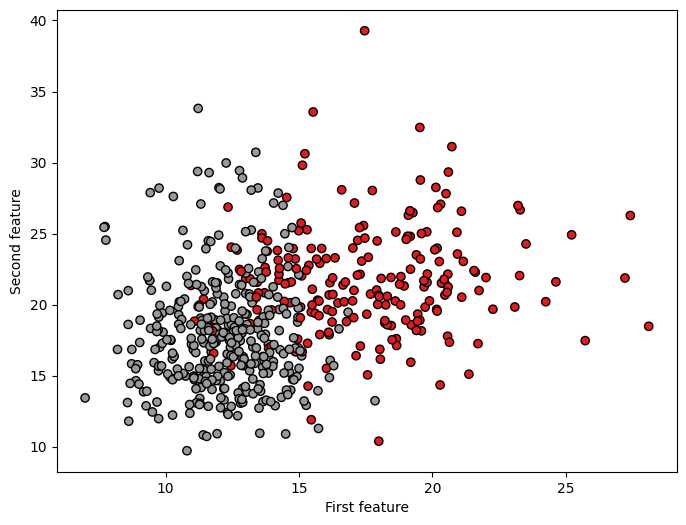

In [44]:
X = cancer.data[:, :2]  # we only take the first two features.
y = cancer.target


plt.figure(2, figsize=(8, 6))
plt.clf()

#Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("First feature")
plt.ylabel("Second feature")

Create a Node class for a single Node, which has the following attributes: X - the summary number of samples in the node, y - the num of samples per class, gini - the gini impurity index of the current node, feature index - the feature index by which the gini impurity was calculated, threshold - the threshold value, by which the evaluation and split is determined, left - left node(child), right - right node(child)


In [42]:
class Node:
    """Create a Node object"""

    def __init__(self, X, y, gini):
        self.X = X
        self.y = y
        self.gini = gini
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None
        self.children_left = 0


Create a MyDecisionTreeClassifier which has the following methods:

__ init __ - the constructor method, initialize the max_depth, the object name, the criterition

__ del __ - the destructor method

gini - the method to evaluate the gini impurity, receives the list of samples in node, calculate the gini impurity using the standart formula.

split_data - a method to create a single best split, returns the best_feature by which we have to split and the best threshold value for the split. Does this by evaluating the left and right gini(and then calculating the summary gini) for each possible split(does not actually try to split during the calculation process), uses the helping method gini to determine the left and right(the gini for a left and right node after the split) gini.

build_tree - basically the functoin that builds the decision tree until max_depth exceeded, creates new nodes of the decision tree and splits the starting data based on the split_data output

fit - a wrapper for build tree, a function used to train the tree on some data

predict - a function that makes the decisions based on the previous data received from training (the test function), after the decision tree was created, it has nodes, and nodes have feature_index and threshold index. So, based on this data the function tries to make predictions on the classes of nodes from the test data it receives

evaluate - a function to evaluate how accurate our prediction was, basically a function to compare to lists with classes of nodes


In [40]:
class MyDecisionTreeClassifier:
    """The Decision Tree Clasifier"""

    def __init__(self, max_depth):
        self.max_depth = max_depth
        self.name = "Tree"
        self.criterion = "entropy"
        

    def __del__(self):
        print(f"Deleting object {self.name}")

    def gini(self, classes: list) -> list:
        """
        A Gini score gives an idea of how good a split is by how mixed the
        classes are in the two groups created by the split.

        A perfect separation results in a Gini score of 0,
        whereas the worst case split that results in 50/50
        classes in each group result in a Gini score of 0.5
        (for a 2 class problem).
        """
        clas = list(set(classes))
        prep = [list(classes).count(clas[i]) for i in range(len(clas))]
        gini = 1 - sum([(val / len(classes)) ** 2 for val in prep])
        return gini

    def split_data(self, X, y) -> tuple[int, float]:
        """
        Returns the best split of node.
        """
        samples = len(y)
        best_gini = float("inf")
        best_index = None
        best_feature = None

        for i in range(X.shape[1]):
            features = list(set(X[:, i]))

            for threshold in features[1:]:
                indices = X[:, i] < threshold
                left_y = y[indices]
                right_y = y[~indices]

                gini_left = self.gini(left_y)
                gini_right = self.gini(right_y)
                gini = (len(left_y) / samples) * gini_left + (
                    len(right_y) / samples
                ) * gini_right

                if gini < best_gini:
                    best_gini = gini
                    best_index = i
                    best_feature = threshold

        return best_index, best_feature

    def build_tree(self, X, y, depth=0):
        """
        Build this decision tree.
        """
        samples_num = len(y)
        samples_per_class = [np.sum(y == c) for c in range(self.n_classes_)]
        # my_gini = 1 - sum((x/sum(samples_per_class))**2 for x in samples_per_class)
        my_gini = self.gini(samples_per_class)
        node = Node(X=samples_num, y=samples_per_class, gini=my_gini)
        if depth < self.max_depth:
            best_index, best_feature = self.split_data(X, y)
            if best_index is not None:
                left_index = X[:, best_index] < best_feature
                right_index = X[:, best_index] >= best_feature
                X_left_split, left_split_y = X[left_index], y[left_index]
                X_right_split, right_split_y = X[right_index], y[right_index]
                node.feature_index = best_index
                node.threshold = best_feature
                depth += 1
                node.left = self.build_tree(X_left_split, left_split_y, depth)
                node.right = self.build_tree(X_right_split, right_split_y, depth)
            return node

    def fit(self, X, y):
        """
        Fits the decision tree.
        """
        self.n_classes_ = len(set(y))
        self.n_features_ = X.shape[1]
        self.tree_ = self.build_tree(X, y)

    def predict(self, X_test):
        """
        Make a prediction.
        """
        predicted_classes = []
        for input in X_test:
            root_node = self.tree_
            while root_node.left:
                if input[root_node.feature_index] < root_node.threshold:
                    root_node = root_node.left
                else:
                    root_node = root_node.right
            predicted_classes.append(np.argmax(root_node.y))
        return predicted_classes

    def evaluate(self, X_test, y_test):
        """Evaluate"""
        # return accuracy
        predictions = self.predict(X_test)
        return sum(predictions == y_test) / len(y_test)


### Example of usage

In [ ]:
the_tree2 = MyDecisionTreeClassifier(max_depth=5)

In [ ]:
X = cancer["data"]
y = cancer["target"]
X.shape, y.shape

### Train / test split

We train our model using training dataset and evaluate its performance basing on the test dataset. Reason to use two separate datasets is that our model learns its parameters from data, thus test set allows us to check its possibilities on completely new data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

### Model learning

It learns its parameters (where it should split data and for what threshold value) basing on the training dataset. It is done by minimizing some cost function (e.g. Gini impurity or entropy).

In [36]:
the_tree2.fit(X_train, y_train)

Deleting object Tree


0.9532163742690059

### Example of work of predict and evaluate function
Shows how exact is our Decision tree clasifier

In [ ]:
y_pred = the_tree2.predict(X_test)
accuracy = the_tree2.evaluate(X_test, y_test)
accuracy

The visualization of the decision tree

In [ ]:
plt.figure(30, figsize=(8, 6))
plt.clf()